In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import math
%matplotlib inline

In [2]:
data=pd.read_excel('C:\pbl_movie.xlsx',header=0)

In [3]:
X=data[['주연 top50 출연 여부','배급사','국적','전국 스크린수','경쟁작',
       '가족','공연','공포(호러)','기타','다큐멘터리','드라마','멜로/로맨스','뮤지컬',
       '미스터리','범죄','사극','스릴러','액션','어드벤처','전쟁',
       '코미디','판타지','SF','top영화감독 여부','네티즌 평점','러닝타임',
       '연작','원작','12세관람가','15세관람가','19세관람가',
       '연휴기간 상영여부']]
X1=data[['주연 top50 출연 여부','배급사', '전국 스크린수','러닝타임', '네티즌 평점',
        'top영화감독 여부','연휴기간 상영여부']]
X2=data[['주연 top50 출연 여부','전국 스크린수','15세관람가','top영화감독 여부','국적',
        '네티즌 평점','연휴기간 상영여부']]
y1=data[['전국 관객수 분류']]

In [4]:
scaler=StandardScaler()
feature_to_scale=['전국 스크린수','러닝타임','네티즌 평점','경쟁작']
feature_to_scale1=['전국 스크린수','러닝타임','네티즌 평점']
feature_to_scale2=['전국 스크린수','네티즌 평점']
scale=scaler.fit_transform(data[feature_to_scale])
scale1=scaler.fit_transform(data[feature_to_scale1])
scale2=scaler.fit_transform(data[feature_to_scale2])
X[feature_to_scale]=scale
X1[feature_to_scale1]=scale1
X2[feature_to_scale2]=scale2

<ipython-input-4-2b440a3bce64>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature_to_scale]=scale
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-4-2b440a3bce64>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [5]:
#나이브 베이지안 분류(정규분포) , 각 특성의 평균과 표준편차 고려
#연속형 데이터에 주로 사용
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
t=pd.DataFrame(columns=['i','score'])
t1=pd.DataFrame(columns=['i','score'])
t2=pd.DataFrame(columns=['i','score'])
for i in range(1,20):
    gnb= GaussianNB(var_smoothing=i/20)
    gnb1 = GaussianNB(var_smoothing=i/20)
    gnb2 = GaussianNB(var_smoothing=i/20)
    
    gnb.fit(X_train,y1_train)
    gnb1.fit(X_train1,y1_train1)
    gnb2.fit(X_train2,y1_train2)
    print(i)
    print("학습 데이터 점수 : {}".format(gnb.score(X_train,y1_train)))
    print("평가 데이터 점수 : {}".format(gnb.score(X_test,y1_test)))
    print("학습 데이터 점수1 : {}".format(gnb1.score(X_train1,y1_train1)))
    print("평가 데이터 점수1 : {}".format(gnb1.score(X_test1,y1_test1)))
    print("학습 데이터 점수2 : {}".format(gnb2.score(X_train2,y1_train2)))
    print("평가 데이터 점수2 : {}".format(gnb2.score(X_test2,y1_test2)))
    t.loc[i-1]=[i/20,gnb.score(X_test,y1_test)]
    t1.loc[i-1]=[i/20,gnb1.score(X_test1,y1_test1)]
    t2.loc[i-1]=[i/20,gnb2.score(X_test2,y1_test2)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

1
학습 데이터 점수 : 0.64875
평가 데이터 점수 : 0.58
학습 데이터 점수1 : 0.63
평가 데이터 점수1 : 0.645
학습 데이터 점수2 : 0.6325
평가 데이터 점수2 : 0.66
2
학습 데이터 점수 : 0.66125
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.635
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 0.635
평가 데이터 점수2 : 0.665
3
학습 데이터 점수 : 0.66
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.63375
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 0.635
평가 데이터 점수2 : 0.665
4
학습 데이터 점수 : 0.65375
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 0.63625
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 0.63
평가 데이터 점수2 : 0.665
5
학습 데이터 점수 : 0.645
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.62875
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 0.62125
평가 데이터 점수2 : 0.67
6
학습 데이터 점수 : 0.64125
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.62
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 0.6125
평가 데이터 점수2 : 0.65
7
학습 데이터 점수 : 0.63125
평가 데이터 점수 : 0.62
학습 데이터 점수1 : 0.61875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.61125
평가 데이터 점수2 : 0.645
8
학습 데이터 점수 : 0.6225
평가 데이터 점수 : 0.615
학습 데이터 점수1 : 0.6175
평가 데이터 점수1 : 0.62
학습 데이터 점수2 : 0.6025
평가 데이터 점수2 : 0.64
9
학습 데이터 점수 : 0.61625
평가 데이터 점수 : 0.61
학습 데이터 점수1 : 0.61375
평가 데이터 점수1 : 0.625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

16
학습 데이터 점수 : 0.58
평가 데이터 점수 : 0.6
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.605
학습 데이터 점수2 : 0.58375
평가 데이터 점수2 : 0.605
17
학습 데이터 점수 : 0.57375
평가 데이터 점수 : 0.6
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.5825
평가 데이터 점수2 : 0.595
18
학습 데이터 점수 : 0.57625
평가 데이터 점수 : 0.6
학습 데이터 점수1 : 0.585
평가 데이터 점수1 : 0.6
학습 데이터 점수2 : 0.57125
평가 데이터 점수2 : 0.595
19
학습 데이터 점수 : 0.575
평가 데이터 점수 : 0.6
학습 데이터 점수1 : 0.585
평가 데이터 점수1 : 0.595
학습 데이터 점수2 : 0.56625
평가 데이터 점수2 : 0.595


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

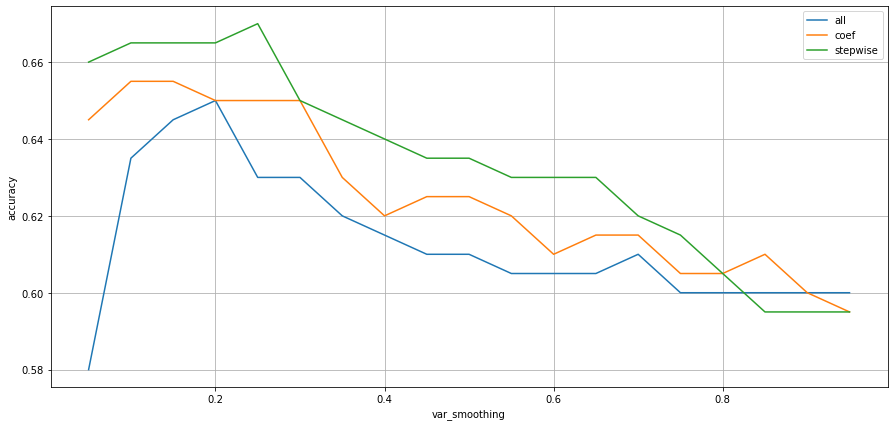

In [6]:
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(t[['i']],t[['score']],label="all")
plt.plot(t1[['i']],t1[['score']],label="coef")
plt.plot(t2[['i']],t2[['score']],label="stepwise")
plt.xlabel('var_smoothing')
plt.ylabel('accuracy')
plt.legend()

In [7]:

X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
gnb= GaussianNB(var_smoothing=0.2)
gnb1 = GaussianNB(var_smoothing=0.1)
gnb2 = GaussianNB(var_smoothing=0.25)

gnb.fit(X_train,y1_train)
gnb1.fit(X_train1,y1_train1)
gnb2.fit(X_train2,y1_train2)

y_pred=gnb.predict(X_test)
y_pred1=gnb1.predict(X_test1)
y_pred2=gnb2.predict(X_test2)

print("학습 데이터 점수 : {}".format(gnb.score(X_train,y1_train)))
print("평가 데이터 점수 : {}".format(gnb.score(X_test,y1_test)))
print("학습 데이터 점수 : {}".format(gnb1.score(X_train1,y1_train1)))
print("평가 데이터 점수 : {}".format(gnb1.score(X_test1,y1_test1)))
print("학습 데이터 점수 : {}".format(gnb2.score(X_train2,y1_train2)))
print("평가 데이터 점수 : {}".format(gnb2.score(X_test2,y1_test2)))

학습 데이터 점수 : 0.65375
평가 데이터 점수 : 0.65
학습 데이터 점수 : 0.635
평가 데이터 점수 : 0.655
학습 데이터 점수 : 0.62125
평가 데이터 점수 : 0.67


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


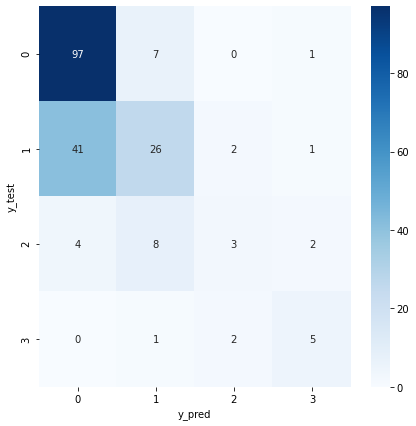

In [8]:
plt.figure(figsize=(7,7))
cm=confusion_matrix(y1_test1,y_pred1)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [9]:
print(classification_report(y1_test1,y_pred1,target_names=['0','1','2','3']))

              precision    recall  f1-score   support

           0       0.68      0.92      0.79       105
           1       0.62      0.37      0.46        70
           2       0.43      0.18      0.25        17
           3       0.56      0.62      0.59         8

    accuracy                           0.66       200
   macro avg       0.57      0.52      0.52       200
weighted avg       0.63      0.66      0.62       200



In [10]:
#크로스탭
y1_test=y1_test.values.ravel()
y1_test1=y1_test1.values.ravel()
y1_test2=y1_test2.values.ravel()
ct=pd.crosstab(index=y1_test,columns=y_pred)
ct1=pd.crosstab(index=y1_test1,columns=y_pred1)
ct2=pd.crosstab(index=y1_test2,columns=y_pred2)
print(ct, "\n{}".format(ct1),"\n{}".format(ct2))

col_0   1   2  3  4
row_0              
1      97   7  0  1
2      45  24  1  0
3       5   6  5  1
4       0   1  3  4 
col_0   1   2  3  4
row_0              
1      97   7  0  1
2      41  26  2  1
3       4   8  3  2
4       0   1  2  5 
col_0    1   2  3  4
row_0               
1      100   4  0  1
2       44  26  0  0
3        6   7  4  0
4        0   3  1  4


In [11]:
X=data[['주연 top50 출연 여부','배급사','국적','전국 스크린수','경쟁작',
       '가족','공연','공포(호러)','기타','다큐멘터리','드라마','멜로/로맨스','뮤지컬',
       '미스터리','범죄','사극','스릴러','액션','어드벤처','전쟁',
       '코미디','판타지','SF','top영화감독 여부','네티즌 평점','러닝타임',
       '연작','원작','12세관람가','15세관람가','19세관람가',
       '연휴기간 상영여부']]
X1=data[['주연 top50 출연 여부','배급사', '전국 스크린수','러닝타임', '네티즌 평점',
        'top영화감독 여부','연휴기간 상영여부']]
X2=data[['주연 top50 출연 여부','전국 스크린수','15세관람가','top영화감독 여부','국적',
        '네티즌 평점','연휴기간 상영여부']]
y1=data[['전국 관객수 분류']]

In [12]:
a=X['러닝타임'].values.ravel()
for i in range(len(a)):
    if a[i]<60:
        a[i]=0
    elif a[i]>=60 and a[i]<120:
        a[i]=1
    elif a[i]>=120 and a[i]<180:
        a[i]=2
    else:
        a[i]=3
b=X['전국 스크린수'].values.ravel()
for j in range(len(b)):
    if b[j]<500:
        b[j]=0
    elif b[j]>=500 and b[j]<1000:
        b[j]=1
    elif b[j]>=1000 and b[j]<1500:
        b[j]=2
    else:
        b[j]=3
c=X['네티즌 평점'].values.ravel()
for k in range(len(c)):
    c[k]=math.floor(c[k])

In [13]:
a=X1['러닝타임'].values.ravel()
for i in range(len(a)):
    if a[i]<60:
        a[i]=0
    elif a[i]>=60 and a[i]<120:
        a[i]=1
    elif a[i]>=120 and a[i]<180:
        a[i]=2
    else:
        a[i]=3
b=X1['전국 스크린수'].values.ravel()
for j in range(len(b)):
    if b[j]<500:
        b[j]=0
    elif b[j]>=500 and b[j]<1000:
        b[j]=1
    elif b[j]>=1000 and b[j]<1500:
        b[j]=2
    else:
        b[j]=3
c=X1['네티즌 평점'].values.ravel()
for k in range(len(c)):
    c[k]=math.floor(c[k])

In [14]:
b=X2['전국 스크린수'].values.ravel()
for j in range(len(b)):
    if b[j]<500:
        b[j]=0
    elif b[j]>=500 and b[j]<1000:
        b[j]=1
    elif b[j]>=1000 and b[j]<1500:
        b[j]=2
    else:
        b[j]=3
c=X2['네티즌 평점'].values.ravel()
for k in range(len(c)):
    c[k]=math.floor(c[k])

In [15]:
#나이브 베이지안 분류 (다항분포) 
#각 특성이 어떤 것의 개수를 나타내는 정수값을 가질 때 주로 사용
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
t=pd.DataFrame(columns=['i','score'])
t1=pd.DataFrame(columns=['i','score'])
t2=pd.DataFrame(columns=['i','score'])
for i in range(1,100):
    mn=MultinomialNB(alpha=i/20)
    mn1=MultinomialNB(alpha=i/20)
    mn2=MultinomialNB(alpha=i/20)
    
    mn.fit(X_train,y1_train)
    mn1.fit(X_train1,y1_train1)
    mn2.fit(X_train2,y1_train2)
    print(i)
    print("학습 데이터 점수 : {}".format(mn.score(X_train,y1_train)))
    print("평가 데이터 점수 : {}".format(mn.score(X_test,y1_test)))
    print("학습 데이터 점수1 : {}".format(mn1.score(X_train1,y1_train1)))
    print("평가 데이터 점수1 : {}".format(mn1.score(X_test1,y1_test1)))
    print("학습 데이터 점수2 : {}".format(mn2.score(X_train2,y1_train2)))
    print("평가 데이터 점수2 : {}".format(mn2.score(X_test2,y1_test2)))
    t.loc[i-1]=[i/20,mn.score(X_test,y1_test)]
    t1.loc[i-1]=[i/20,mn1.score(X_test1,y1_test1)]
    t2.loc[i-1]=[i/20,mn2.score(X_test2,y1_test2)]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

1
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
2
학습 데이터 점수 : 0.60625
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
3
학습 데이터 점수 : 0.605
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
4
학습 데이터 점수 : 0.605
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
5
학습 데이터 점수 : 0.605
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
6
학습 데이터 점수 : 0.605
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
7
학습 데이터 점수 : 0.60625
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
8
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
9
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수2 : 0.635
10
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
11
학습 데이터 점수 : 0.60875
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
12
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
13
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
14
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
15
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
16
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
17
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
18
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.645

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
19
학습 데이터 점수 : 0.60875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.59
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
20
학습 데이터 점수 : 0.60875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.59125
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
21
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.59125
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
22
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.58875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
23
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.58875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
24
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.58875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
25
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.58875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
26
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.5875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


27
학습 데이터 점수 : 0.60875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.5875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.5875
평가 데이터 점수2 : 0.635
28
학습 데이터 점수 : 0.60875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.5875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.5875
평가 데이터 점수2 : 0.635
29
학습 데이터 점수 : 0.60875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.5875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.5875
평가 데이터 점수2 : 0.635
30
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.5875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.5875
평가 데이터 점수2 : 0.635
31
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.5875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.5875
평가 데이터 점수2 : 0.635
32
학습 데이터 점수 : 0.60875
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.5875
평가 데이터 점수2 : 0.635
33
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.59
평가 데이터 점수2 : 0.635
34
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.59
평가 데이터 점수2 : 0.635
35
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.58625
평가 데

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

36
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
37
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
38
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
39
학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
40
학습 데이터 점수 : 0.60875
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
41
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58875
평가 데이터 점수2 : 0.635
42
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.5875
평가 데이터 점수2 : 0.635
43
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.58625
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.5875
평가 데이터 점수2 : 0.635
44
학습 데이터 점수 : 0.61
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.58625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수2 : 0.625
54
학습 데이터 점수 : 0.60625
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
55
학습 데이터 점수 : 0.605
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
56
학습 데이터 점수 : 0.605
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
57
학습 데이터 점수 : 0.605
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
58
학습 데이터 점수 : 0.605
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
59
학습 데이터 점수 : 0.60375
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
60
학습 데이터 점수 : 0.60375
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
61
학습 데이터 점수 : 0.6025
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

62
학습 데이터 점수 : 0.6025
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
63
학습 데이터 점수 : 0.60125
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.5775
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
64
학습 데이터 점수 : 0.60125
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
65
학습 데이터 점수 : 0.60125
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
66
학습 데이터 점수 : 0.60125
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
67
학습 데이터 점수 : 0.60125
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
68
학습 데이터 점수 : 0.6
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
69
학습 데이터 점수 : 0.6
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.57875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
70
학습 데이터 점수 : 0.6
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
72
학습 데이터 점수 : 0.59625
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.57875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
73
학습 데이터 점수 : 0.59625
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 0.57875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
74
학습 데이터 점수 : 0.5975
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
75
학습 데이터 점수 : 0.5975
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
76
학습 데이터 점수 : 0.5975
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
77
학습 데이터 점수 : 0.5975
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
78
학습 데이터 점수 : 0.5975
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57875
평가 데이터 점수1 : 0.63
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
79
학습 데이터 점수 : 0.59625
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
80
학습 데이

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
81
학습 데이터 점수 : 0.595
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
82
학습 데이터 점수 : 0.595
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
83
학습 데이터 점수 : 0.595
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.62
84
학습 데이터 점수 : 0.595
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.5825
평가 데이터 점수2 : 0.625
85
학습 데이터 점수 : 0.595
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.5825
평가 데이터 점수2 : 0.625
86
학습 데이터 점수 : 0.595
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.5825
평가 데이터 점수2 : 0.625
87
학습 데이터 점수 : 0.59625
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.58125
평가 데이터 점수2 : 0.625
88
학습 데이터 점수 : 0.59625
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.5825
평가 데이터 점수2 : 0.625
89
학습 데이터 점수 : 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**


평가 데이터 점수2 : 0.625
90
학습 데이터 점수 : 0.59375
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.57875
평가 데이터 점수2 : 0.625
91
학습 데이터 점수 : 0.59375
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.575
평가 데이터 점수1 : 0.61
학습 데이터 점수2 : 0.57875
평가 데이터 점수2 : 0.625
92
학습 데이터 점수 : 0.5925
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.615
학습 데이터 점수2 : 0.57875
평가 데이터 점수2 : 0.625
93
학습 데이터 점수 : 0.5925
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.615
학습 데이터 점수2 : 0.57875
평가 데이터 점수2 : 0.625
94
학습 데이터 점수 : 0.59375
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.615
학습 데이터 점수2 : 0.57875
평가 데이터 점수2 : 0.625
95
학습 데이터 점수 : 0.5925
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.615
학습 데이터 점수2 : 0.57875
평가 데이터 점수2 : 0.625
96
학습 데이터 점수 : 0.59125
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.615
학습 데이터 점수2 : 0.57875
평가 데이터 점수2 : 0.625
97
학습 데이터 점수 : 0.59125
평가 데이터 점수 : 0.635
학습 데이터 점수1 : 0.57625
평가 데이터 점수1 : 0.615
학습 데이터 점수2 : 0.57875
평가 데이터 점수2 : 0.625
98
학습 데이터 점수 : 0.5912

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

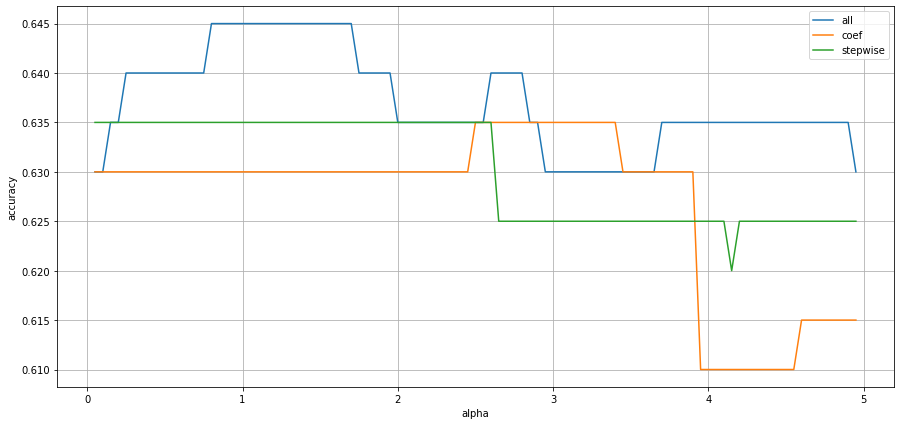

In [16]:
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(t[['i']],t[['score']],label="all")
plt.plot(t1[['i']],t1[['score']],label="coef")
plt.plot(t2[['i']],t2[['score']],label="stepwise")
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

In [17]:
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
mn = MultinomialNB(alpha=1.25)
mn1 = MultinomialNB(alpha=3)
mn2 = MultinomialNB(alpha=1.3)

mn.fit(X_train,y1_train)
mn1.fit(X_train1,y1_train1)
mn2.fit(X_train2,y1_train2)
y_pred=mn.predict(X_test)
y_pred1=mn1.predict(X_test1)
y_pred2=mn2.predict(X_test2)

print("학습 데이터 점수 : {}".format(mn.score(X_train,y1_train)))
print("평가 데이터 점수 : {}".format(mn.score(X_test,y1_test)))
print("학습 데이터 점수 : {}".format(mn1.score(X_train1,y1_train1)))
print("평가 데이터 점수 : {}".format(mn1.score(X_test1,y1_test1)))
print("학습 데이터 점수 : {}".format(mn2.score(X_train2,y1_train2)))
print("평가 데이터 점수 : {}".format(mn2.score(X_test2,y1_test2)))

학습 데이터 점수 : 0.6075
평가 데이터 점수 : 0.645
학습 데이터 점수 : 0.5775
평가 데이터 점수 : 0.635
학습 데이터 점수 : 0.5875
평가 데이터 점수 : 0.635


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


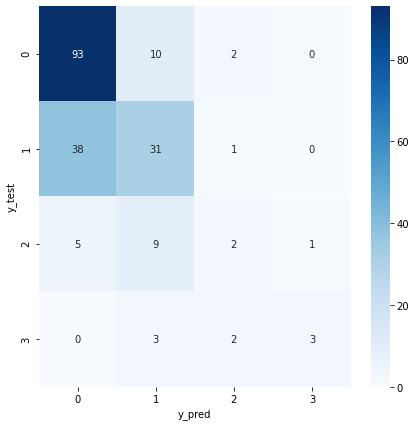

In [18]:
plt.figure(figsize=(7,7))
cm=confusion_matrix(y1_test,y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [19]:
print(classification_report(y1_test,y_pred,target_names=['0','1','2','3']))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       105
           1       0.58      0.44      0.50        70
           2       0.29      0.12      0.17        17
           3       0.75      0.38      0.50         8

    accuracy                           0.65       200
   macro avg       0.58      0.46      0.49       200
weighted avg       0.62      0.65      0.62       200



In [20]:
#크로스탭
y1_test=y1_test.values.ravel()
y1_test1=y1_test1.values.ravel()
y1_test2=y1_test2.values.ravel()
ct=pd.crosstab(index=y1_test,columns=y_pred)
ct1=pd.crosstab(index=y1_test1,columns=y_pred1)
ct2=pd.crosstab(index=y1_test2,columns=y_pred2)
print(ct, "\n{}".format(ct1),"\n{}".format(ct2))

col_0   1   2  3  4
row_0              
1      93  10  2  0
2      38  31  1  0
3       5   9  2  1
4       0   3  2  3 
col_0   1   2  3  4
row_0              
1      96   9  0  0
2      43  26  1  0
3       5  10  1  1
4       0   3  1  4 
col_0   1   2  3  4
row_0              
1      96   8  1  0
2      43  26  1  0
3       5  10  1  1
4       0   3  1  4
